In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa
import librosa.display
from IPython.display import Audio
import warnings


# Load Dataset

In [2]:
paths = []
labels = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())


In [3]:
paths[:10]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_dodge_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_void_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_sheep_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/T

In [4]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [5]:
df = pd.DataFrame({'speech': paths, 'labels': labels})
df

,speech,labels
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear
...,...,...
5595,/kaggle/input/toronto-emotional-speech-set-tes...,ps
5596,/kaggle/input/toronto-emotional-speech-set-tes...,ps
5597,/kaggle/input/toronto-emotional-speech-set-tes...,ps
5598,/kaggle/input/toronto-emotional-speech-set-tes...,ps


In [6]:
df['labels'].value_counts()

labels
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

# Visualizations

In [7]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

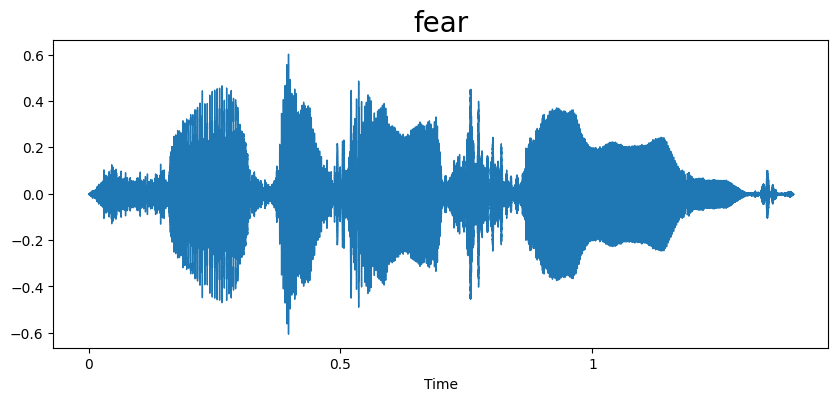

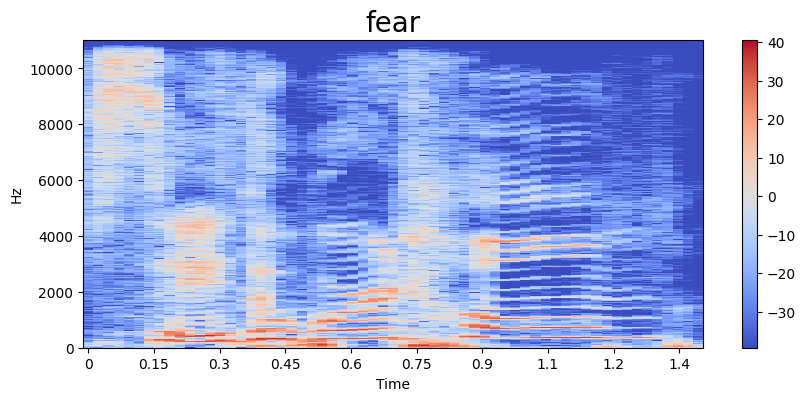

In [9]:
path = df['speech'][df['labels']=='fear'][0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, 'fear')
spectrogram(data, sampling_rate, 'fear')

In [10]:
Audio(path)

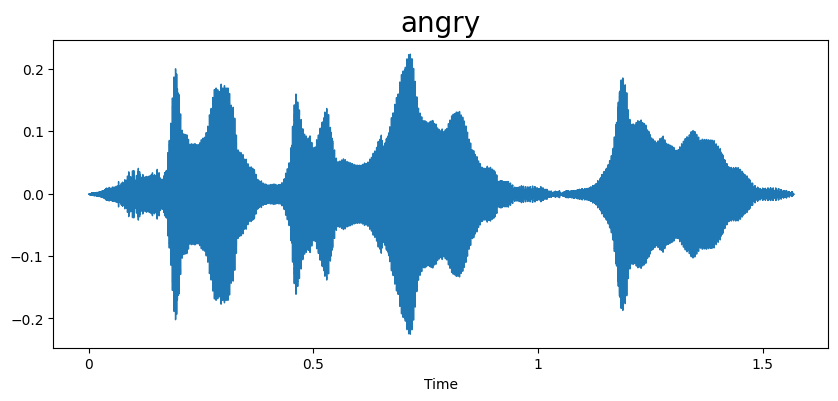

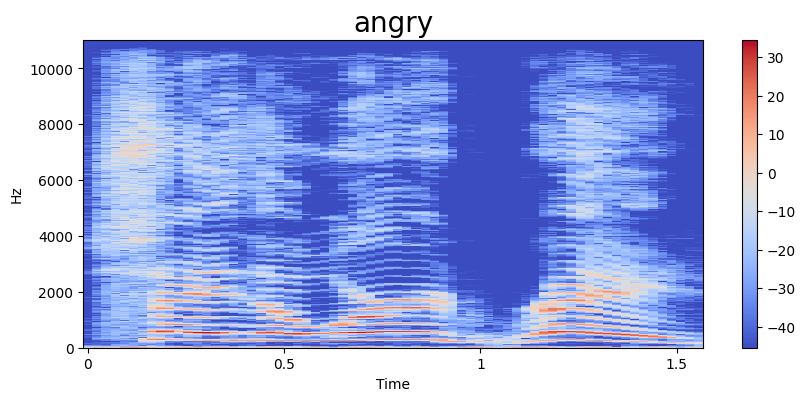

In [26]:
path = np.array(df['speech'][df['labels']=='angry'])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, 'angry')
spectrogram(data, sampling_rate, 'angry')

In [27]:
Audio(path)

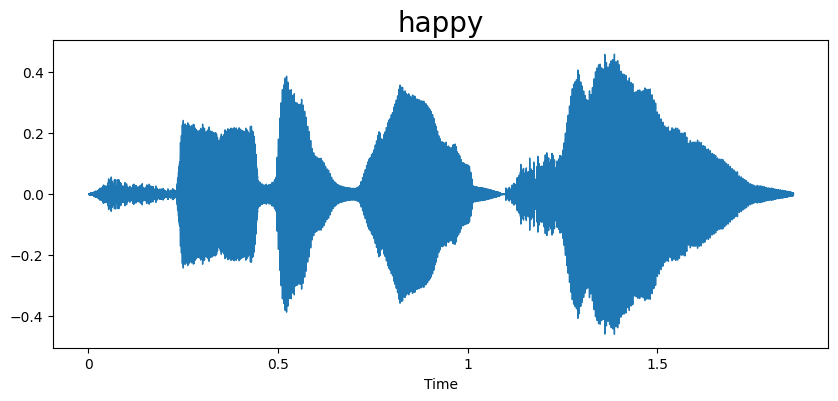

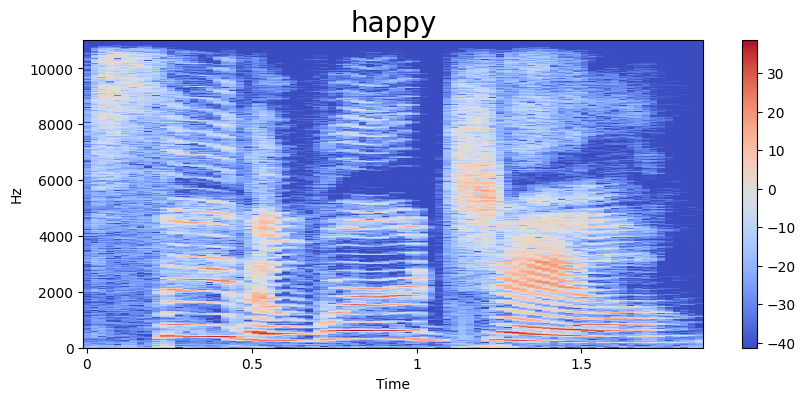

In [28]:
path = np.array(df['speech'][df['labels']=='happy'])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, 'happy')
spectrogram(data, sampling_rate, 'happy')

In [29]:
Audio(path)

In [30]:
def extractmfcc(file_name):
    y,sr = librosa.load(file_name, duration=3, offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=400).T, axis=0)
    return mfcc

In [31]:
extractmfcc(df['speech'][0])

array([-2.8573730e+02,  8.5782951e+01, -2.1689105e+00,  2.2125532e+01,
       -1.4757396e+01,  1.1051346e+01,  1.2412452e+01, -3.0002632e+00,
        1.0844971e+00,  1.1078272e+01, -1.7419662e+01, -8.0932150e+00,
        6.5879736e+00, -4.2209530e+00, -9.1550798e+00,  3.5214789e+00,
       -1.3186381e+01,  1.4078853e+01,  1.9669733e+01,  2.2725618e+01,
        3.2574642e+01,  1.6325031e+01, -3.8427277e+00,  8.9629626e-01,
       -1.1239262e+01,  6.6534619e+00, -2.5883691e+00, -7.7140174e+00,
       -1.0941658e+01, -2.4007556e+00, -5.2812862e+00,  4.2711563e+00,
       -1.1202216e+01, -9.0246210e+00, -3.6669848e+00,  4.8697433e+00,
       -1.6027985e+00,  2.5600505e+00,  1.1454375e+01,  1.1233450e+01,
        3.2753129e+00, -2.1985726e+00,  5.4239196e-01,  3.1924698e+00,
       -7.0180351e-01, -2.2473004e+00,  1.9301200e+00, -9.6152741e-01,
       -8.7169657e+00,  9.4792676e-01,  2.5428541e+00, -2.7433856e+00,
       -8.5658293e+00, -9.4056231e-01,  4.4084832e-01,  2.4702568e-01,
      

In [33]:
x_mfcc = df['speech'].apply(lambda x: extractmfcc(x))

In [34]:
x_mfcc

0       [-285.7373, 85.78295, -2.1689105, 22.125532, -...
1       [-348.34332, 35.193233, -3.8413274, 14.658875,...
2       [-340.11435, 53.796444, -14.267782, 20.884031,...
3       [-306.6343, 21.25971, -4.4110823, 6.4871554, -...
4       [-344.7548, 46.329193, -24.171415, 19.392921, ...
                              ...                        
5595    [-374.39523, 60.865, 0.025058376, 8.431059, -2...
5596    [-313.9648, 39.847843, -5.6493053, -3.8675752,...
5597    [-357.54886, 77.88606, -15.224756, 2.1946328, ...
5598    [-353.14743, 101.68391, -14.175895, -12.037377...
5599    [-389.4595, 54.042767, 1.3469967, -1.4258995, ...
Name: speech, Length: 5600, dtype: object

In [35]:
X = [x for x in x_mfcc]
X = np.array(X)
X.shape

(5600, 128)

In [36]:
X = np.expand_dims(X, -1)
X.shape

(5600, 128, 1)

In [37]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder()

In [38]:
y = oe.fit_transform(df[['labels']])

In [39]:
y = y.toarray()

In [40]:
y.shape

(5600, 7)

# Model

In [41]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [44]:
model = Sequential([
    LSTM(128, return_sequences=False, input_shape=(128,1)), 
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               66560     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 7)                 231       
                                                                 
Total params: 77127 (301.28 KB)
Trainable params: 7712

In [45]:
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=1000, shuffle=True)

Epoch 1/100


I0000 00:00:1707651995.644014     122 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 [==============================] - 5s 178ms/step - loss: 1.9367 - accuracy: 0.1768 - val_loss: 1.9774 - val_accuracy: 0.0634
Epoch 2/100
5/5 [==============================] - 0s 44ms/step - loss: 1.9045 - accuracy: 0.2212 - val_loss: 2.0256 - val_accuracy: 0.0536
Epoch 3/100
5/5 [==============================] - 0s 38ms/step - loss: 1.8418 - accuracy: 0.2708 - val_loss: 2.1005 - val_accuracy: 0.0634
Epoch 4/100
5/5 [==============================] - 0s 38ms/step - loss: 1.7653 - accuracy: 0.3056 - val_loss: 2.3495 - val_accuracy: 0.0473
Epoch 5/100
5/5 [==============================] - 0s 38ms/step - loss: 1.7231 - accuracy: 0.3263 - val_loss: 2.3361 - val_accuracy: 0.0429
Epoch 6/100
5/5 [==============================] - 0s 40ms/step - loss: 1.6821 - accuracy: 0.3549 - val_loss: 2.1511 - val_accuracy: 0.0571
Epoch 7/100
5/5 [==============================] - 0s 40ms/step - loss: 1.6406 - accuracy: 0.3824 - val_loss: 2.1779 - val_accuracy: 0.0723
Epoch 8/100
5/5 [==============

# Plotting

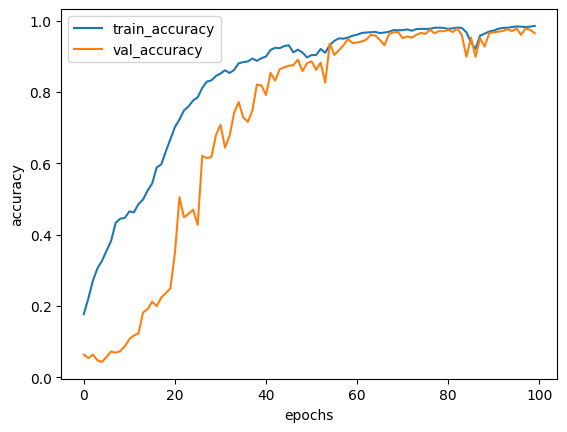

In [48]:
epochs = list(range(100))
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, label='train_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

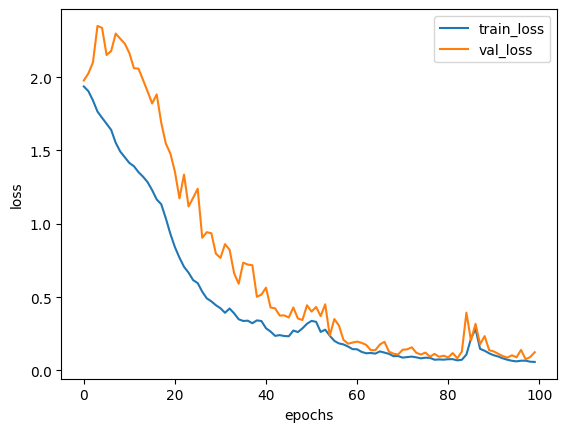

In [50]:
epochs = list(range(100))
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()